11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
Epoch 1/10


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.3211 - val_accuracy: 0.9518 - val_loss: 0.2031
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9508 - loss: 0.1793 - val_accuracy: 0.9580 - val_loss: 0.2011
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1320 - val_accuracy: 0.9632 - val_loss: 0.1842
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1225 - val_accuracy: 0.9658 - val_loss: 0.2083
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1073 - val_accuracy: 0.9611 - val_loss: 0.2559
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0872 - val_accuracy: 0.9693 - val_loss: 0.2840
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0805 - val_accuracy: 0.9682 - val_loss: 0.2898
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0729 - val_accurac

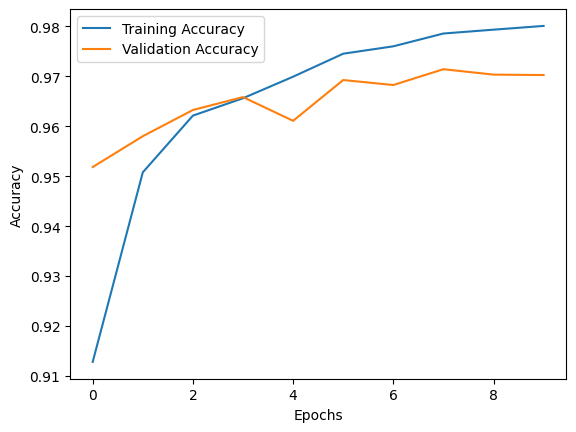

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


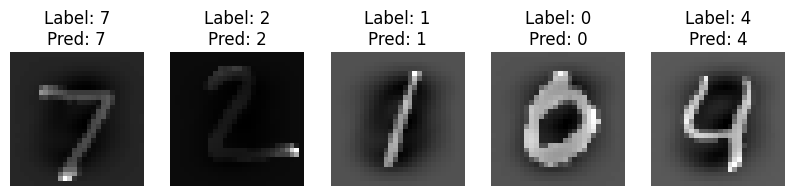

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images to one-dimensional arrays
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
val_images = scaler.transform(val_images)
test_images = scaler.transform(test_images)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to display images with labels and optional predictions
def display_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 4))
    for i in range(5):  # Displaying 5 examples
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        title = f"Label: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# Example: Display first 5 test images with true labels and model predictions
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)
display_images(test_images, test_labels, predicted_labels)
